In [52]:
# 异常点检测算法-One Class SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [14]:
# 产生一些数据
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))         
# meshgrid :从坐标向量返回坐标矩阵。xx代表的是500个向量，排列成列，500个相同的列；yy排列成行，500个相同的行

print(xx)
print("\n")
print(yy)

[[-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]
 [-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]
 [-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]
 ..., 
 [-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]
 [-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]
 [-5.         -4.97995992 -4.95991984 ...,  4.95991984  4.97995992  5.        ]]


[[-5.         -5.         -5.         ..., -5.         -5.         -5.        ]
 [-4.97995992 -4.97995992 -4.97995992 ..., -4.97995992 -4.97995992
  -4.97995992]
 [-4.95991984 -4.95991984 -4.95991984 ..., -4.95991984 -4.95991984
  -4.95991984]
 ..., 
 [ 4.95991984  4.95991984  4.95991984 ...,  4.95991984  4.95991984
   4.95991984]
 [ 4.97995992  4.97995992  4.97995992 ...,  4.97995992  4.97995992
   4.97995992]
 [ 5.          5.          5.         ...,  5.          5.          5.        ]]


In [44]:
# 生成训练集，np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，
X = 0.3 * np.random.randn(100, 2)
X_train = np.array(np.r_[X + 2, X - 2], dtype='float64')
print(X_train.dtype)

print(X_train)

# 生成正常的观测集
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# 生成不正常的观测集
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
# numpy.random.uniform(low,high,size)
# 功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
# print(X_outliers)

float64
[[ 2.47468344  2.03188912]
 [ 1.85666685  2.03269854]
 [ 1.99488642  1.99514519]
 [ 2.12518124  1.61179297]
 [ 1.96027334  1.93679927]
 [ 2.31976739  2.32463211]
 [ 1.85286695  1.80904311]
 [ 2.37410829  2.26524126]
 [ 2.23599527  1.93739402]
 [ 2.39941725  1.98074635]
 [ 1.81652117  2.13979975]
 [ 1.51041315  2.87333309]
 [ 1.83548109  1.99782312]
 [ 1.5416691   2.15393275]
 [ 2.18650493  2.42081145]
 [ 1.86363847  1.85526176]
 [ 2.25131075  1.98690803]
 [ 1.71133532  2.31635223]
 [ 2.14231322  1.93123363]
 [ 1.50955817  2.40076554]
 [ 1.45527691  2.21809905]
 [ 2.02812679  2.65606951]
 [ 2.0892068   1.99287435]
 [ 1.85548615  1.74958269]
 [ 1.67959116  2.385587  ]
 [ 1.9375324   2.14060726]
 [ 2.17185754  2.06882162]
 [ 2.1886126   2.34370882]
 [ 1.82482913  2.01986375]
 [ 1.88162892  2.30901966]
 [ 2.04414951  2.17098835]
 [ 2.3541978   1.52690646]
 [ 1.68862984  1.91345964]
 [ 1.97907897  1.60947973]
 [ 1.87889288  1.86161209]
 [ 2.22736994  2.12581454]
 [ 1.82326707  1.864

In [71]:
clf = OneClassSVM(nu = 0.01, kernel='rbf', gamma = 0.1)
clf.fit(X_train)

# 查看训练集上的分类情况
y_pred_train = clf.predict(X_train)
print(y_pred_train)

y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


# 统计离群点的个数
n_error_train = str(y_pred_train[y_pred_train == -1].size)
n_error_test = str(y_pred_test[y_pred_test == -1].size)
n_error_outliers = str(y_pred_outliers[y_pred_outliers == -1].size)

print("\n训练集中错误点："+n_error_train+" 测试集中错误点："+n_error_test+" 离群点中的错误点："+n_error_outliers)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]

训练集中错误点：2 测试集中错误点：0 离群点中的错误点：18


In [63]:
support_vector = clf.support_vectors_

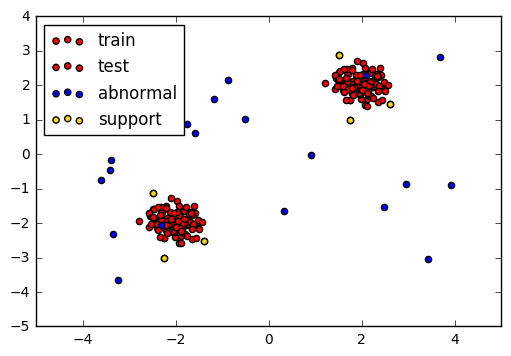

In [88]:
# 画出散点图

plt.scatter(X_train[:, 0], X_train[:, 1], c='r', label = 'train')
plt.scatter(X_test[:, 0], X_test[:, 1], c='r', label = 'test')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], label = 'abnormal')
plt.scatter(support_vector[:, 0], support_vector[:, 1], c='gold', label = 'support')
plt.legend(loc='upper left')#左上角显示legend
plt.show()